# Data Analysis

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
def plot_success_rate_from_dict_list(csv_files_with_model_names):
    categories = [
        "News and Current Events",
        "Pop Culture and Entertainment",
        "Personal and Lifestyle",
        "Opinion-Based and Controversial Topics",
        "Technology and Industry Trends",
    ]
    num_rows_per_category = 50
    total_categories = len(categories)

    # Initialize a dictionary to hold success rates for each model
    model_success_rates = {model_dict['model']: {category: 0 for category in categories} for model_dict in csv_files_with_model_names}

    # Process each CSV file
    for model_dict in csv_files_with_model_names:
        file_path = model_dict['file']
        model_name = model_dict['model']
        df = pd.read_csv(file_path)

        for i, category in enumerate(categories):
            start_idx = i * num_rows_per_category
            end_idx = start_idx + num_rows_per_category
            category_data = df.iloc[start_idx:end_idx]
            successful_count = category_data['label'].str.lower().eq('no').sum()
            model_success_rates[model_name][category] = successful_count / num_rows_per_category * 100  # Calculate success rate

    # Print metrics
    print("Success Rates by Model and Category:")
    for model_name, success_rate in model_success_rates.items():
        print(f"\nModel: {model_name}")
        for category, rate in success_rate.items():
            print(f"  {category}: {rate:.2f}%")

    # Plot the results
    bar_width = 0.1
    x_indices = range(len(categories))
    plt.figure(figsize=(14, 8))

    for i, (model_name, success_rate) in enumerate(model_success_rates.items()):
        bar_positions = [x + i * bar_width for x in x_indices]
        plt.bar(bar_positions, success_rate.values(), bar_width, label=model_name)

    plt.title('Fooling Rate Comparison of Different Bots', fontsize=16)
    plt.xlabel('Categories', fontsize=12)
    plt.ylabel('Success Rate (%)', fontsize=12)
    plt.xticks([x + bar_width * (len(model_success_rates) - 1) / 2 for x in x_indices], categories, rotation=45, ha='right')
    plt.legend(title="Models")
    plt.tight_layout()
    plt.show()


Success Rates by Model and Category:

Model: Human Baseline
  News and Current Events: 34.00%
  Pop Culture and Entertainment: 82.00%
  Personal and Lifestyle: 64.00%
  Opinion-Based and Controversial Topics: 54.00%
  Technology and Industry Trends: 50.00%

Model: Phi-3.5-14B
  News and Current Events: 12.00%
  Pop Culture and Entertainment: 8.00%
  Personal and Lifestyle: 2.00%
  Opinion-Based and Controversial Topics: 6.00%
  Technology and Industry Trends: 6.00%

Model: Phi-3.5-tweet-100k
  News and Current Events: 22.00%
  Pop Culture and Entertainment: 30.00%
  Personal and Lifestyle: 46.00%
  Opinion-Based and Controversial Topics: 20.00%
  Technology and Industry Trends: 28.00%

Model: Phi-3.5-tweet-50k
  News and Current Events: 24.00%
  Pop Culture and Entertainment: 22.00%
  Personal and Lifestyle: 44.00%
  Opinion-Based and Controversial Topics: 20.00%
  Technology and Industry Trends: 16.00%

Model: Phi-3.5-tweet-50k-rag
  News and Current Events: 28.00%
  Pop Culture and E

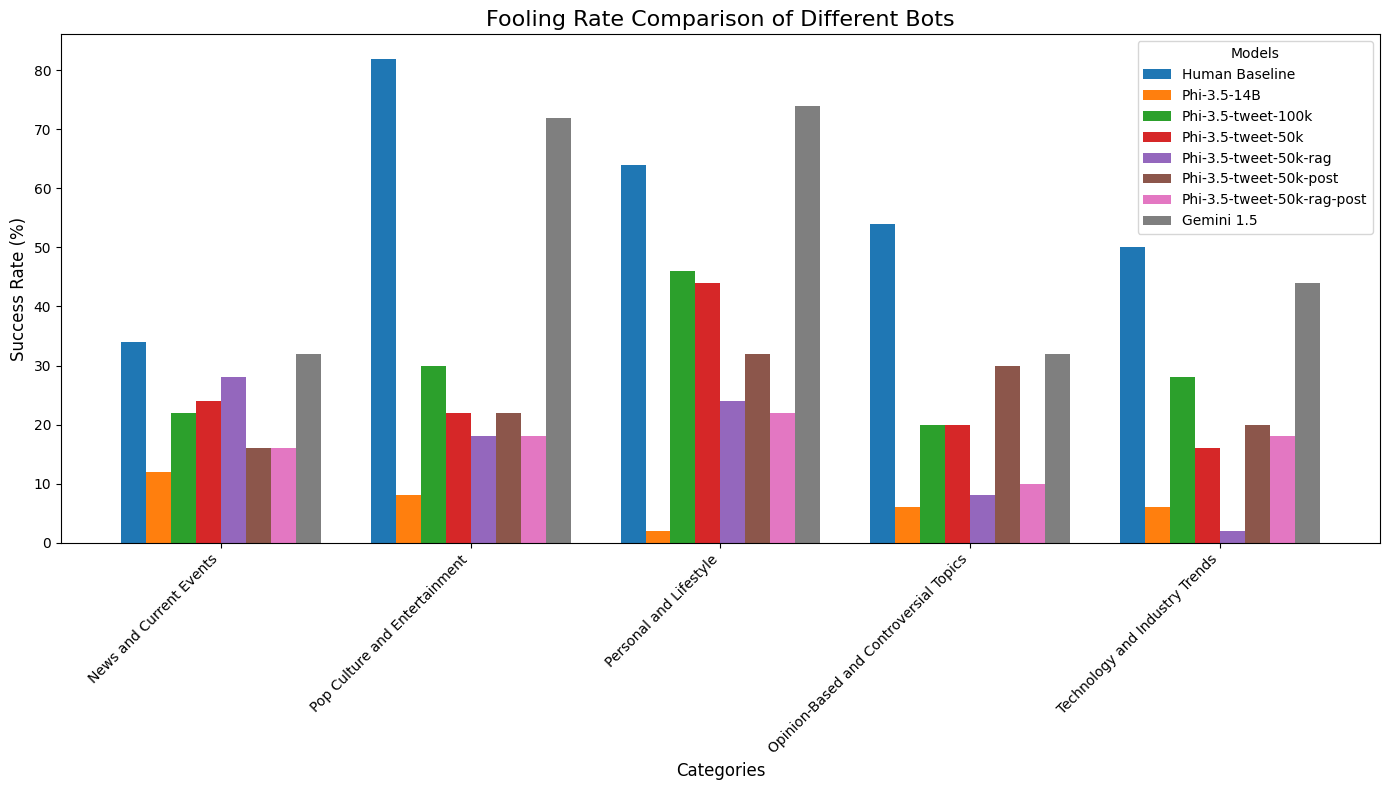

In [49]:
csv_files = [
    {'file': 'eval/human_tweets_baseline.csv', 'model': 'Human Baseline'},
    {'file': 'eval/14B_3shots_real.csv', 'model': 'Phi-3.5-14B'},
    {'file': 'eval/100k_3shots_real.csv', 'model': 'Phi-3.5-tweet-100k'},
    {'file': 'eval/50k_3shots_real.csv', 'model': 'Phi-3.5-tweet-50k'},
    {'file': 'eval/50k_3shots_rag_real.csv', 'model': 'Phi-3.5-tweet-50k-rag'},
    {'file': 'eval/50k_3_shots_post_real_alan.csv', 'model': 'Phi-3.5-tweet-50k-post'},
    {'file': 'eval/50k_3shots_rag_post_real.csv', 'model': 'Phi-3.5-tweet-50k-rag-post'},
    {'file': 'eval/gemini_baseline.csv', 'model': 'Gemini 1.5'},
]

plot_success_rate_from_dict_list(csv_files)